In [1]:
import copy
import lmfit
import numpy as np
import matplotlib.pyplot as plt
from rich.progress import Progress
from scipy.stats import binned_statistic
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices_attrs

In [91]:
fname = "2021_2_24.hdf"
dset_name = "1614205557 find Q23 fluorescence"
devices = ()

In [92]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

freq_attr = 'Laser Lock 2 SetLockPointSeed3'

In [93]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

freq_data = np.array([pxie_attrs[idx][freq_attr] for idx in range(1,len(pxie)+1)])

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [94]:
dset_len = 2000
nbunch = 5

In [95]:
mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

freq_data_avg = freq_data.reshape(-1,nbunch).mean(axis = 1)

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-95-d509b60ee146>:6: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-95-d509b60ee146>:7: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


Text(0.5, 0, 'integral [bits]')

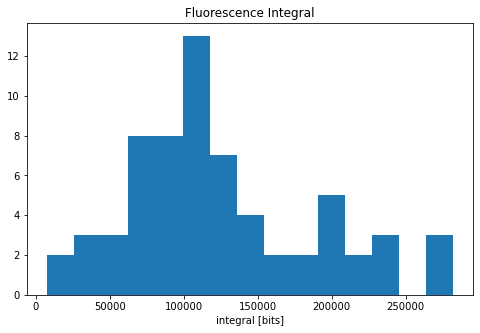

In [96]:
fig, ax = plt.subplots(figsize = (8,5))

ax.hist(fluorescence_integral, bins = 15)

ax.set_title('Fluorescence Integral')
ax.set_xlabel('integral [bits]')

In [97]:
mask_fluorescence = fluorescence_integral <= 5e4

fluorescence_integral[mask_fluorescence] = np.nan
absorption_integral[mask_fluorescence] = np.nan

<ipython-input-99-c7eb39a3cc90>:1: RuntimeWarning: Mean of empty slice
  bin_fun = lambda x: np.nanmean(x)


Text(0.5, 0, 'uv frequency [MHz]')

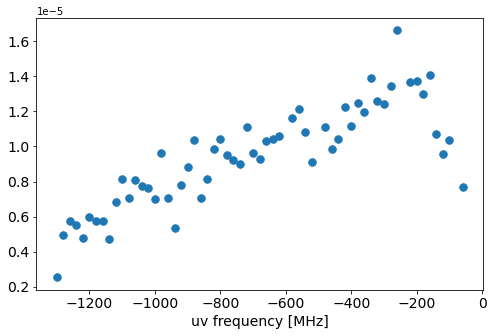

In [99]:
bin_fun = lambda x: np.nanmean(x)

bin_width = 5
bins = np.arange(freq_data.min()-bin_width/2, freq_data.max()+bin_width/2, bin_width)

stat, bin_edges, bin_number = binned_statistic(freq_data_avg, absorption_integral/fluorescence_integral, statistic = bin_fun, bins = bins)

bin_means = bin_edges[:-1]+np.diff(bin_edges)[0]/2

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(bin_means*4, stat, '.', ms = 15)
set_fontsize(ax, 14)

ax.set_xlabel('uv frequency [MHz]')

-65.0 MHz IR


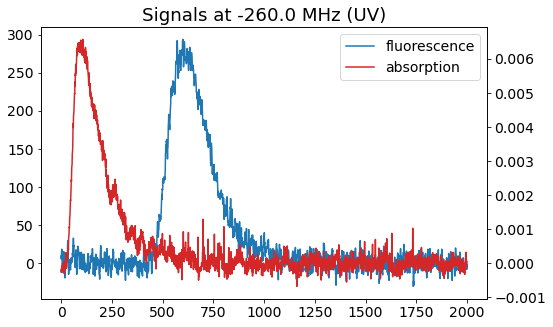

In [10]:
idx_max = np.where(np.nanargmax(stat)+1 == bin_number)[0][0]

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(pmt_data_avg[idx_max], label = 'fluorescence')
ax1 = ax.twinx()
ax1.plot(norm_data_avg[idx_max], color = 'C3', label = 'absorption')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, fontsize = 14)

# fig.legend(fontsize = 14, bbox_to_anchor = (0.9, 0.875))

ax.set_title(f'Signals at {freq_data_avg[idx_max]*4} MHz (UV)')
set_fontsize(ax, 14)
set_fontsize(ax1, 14)

print(f"{freq_data_avg[idx_max]} MHz IR")

# Scan R0 F1

In [11]:
fname = "2021_2_24.hdf"
dset_name = "1614212633 find R0 F1"
devices = ()

In [12]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

freq_attr = 'Laser Lock 1 SetLockPointSeed2'

In [13]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

freq_data = np.array([pxie_attrs[idx][freq_attr] for idx in range(1,len(pxie)+1)])

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [14]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

freq_data_avg = freq_data.reshape(-1,nbunch).mean(axis = 1)

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-14-7f7d569b6c6c>:9: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-14-7f7d569b6c6c>:10: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


Text(0.5, 0, 'integral [bits]')

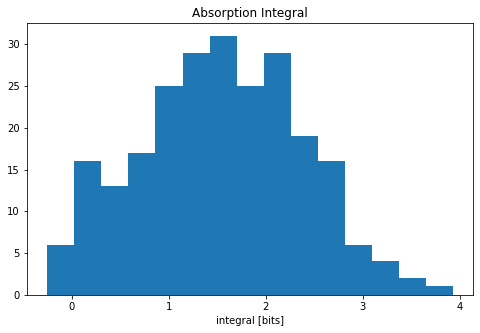

In [15]:
fig, ax = plt.subplots(figsize = (8,5))

ax.hist(absorption_integral, bins = 15)

ax.set_title('Absorption Integral')
ax.set_xlabel('integral [bits]')

In [16]:
mask_absorption = absorption_integral <= 0.5

fluorescence_integral[mask_absorption] = np.nan
absorption_integral[mask_absorption] = np.nan

Text(0.5, 0, 'uv frequency [MHz]')

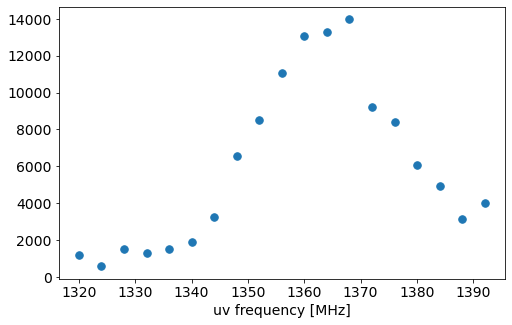

In [23]:
bin_fun = lambda x: np.nanmean(x)

bin_width = 1
bins = np.arange(freq_data.min()-bin_width/2, freq_data.max()+bin_width/2, bin_width)

stat, bin_edges, bin_number = binned_statistic(freq_data_avg, fluorescence_integral/absorption_integral, 
                                               statistic = bin_fun, bins = bins)

bin_means = bin_edges[:-1]+np.diff(bin_edges)[0]/2

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(bin_means*4, stat, '.', ms = 15)
set_fontsize(ax, 14)

ax.set_xlabel('uv frequency [MHz]')

12983.184019531702
342.0 MHz IR


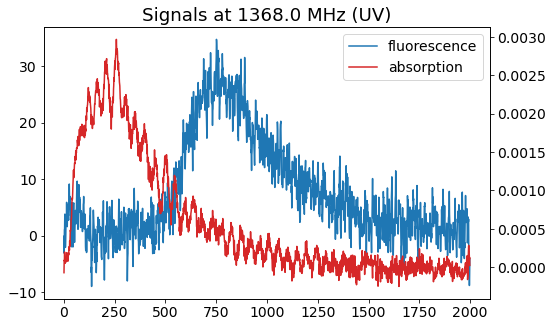

In [24]:
idx_max = np.where(np.nanargmax(stat)+1 == bin_number)[0]

pmt = np.nanmean(pmt_data_avg[idx_max], axis = 0)
ab  = np.nanmean(norm_data_avg[idx_max], axis = 0)

fig, ax = plt.subplots(figsize = (8,5))

ax.plot(pmt, label = 'fluorescence')
ax1 = ax.twinx()
ax1.plot(ab, color = 'C3', label = 'absorption')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, fontsize = 14)

# fig.legend(fontsize = 14, bbox_to_anchor = (0.9, 0.875))

ax.set_title(f'Signals at {freq_data_avg[idx_max[0]]*4} MHz (UV)')
set_fontsize(ax, 14)
set_fontsize(ax1, 14)

print(np.nanmean(fluorescence_integral[idx_max], axis = 0)/np.nanmean(absorption_integral[idx_max], axis = 0))

print(f"{freq_data_avg[idx_max[0]]} MHz IR")

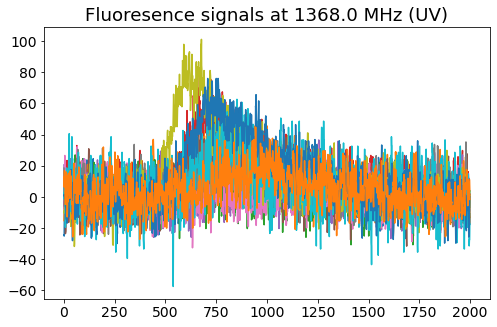

In [27]:
fig, ax = plt.subplots(figsize = (8,5))

ax.plot(pmt_data_avg[idx_max].T)

ax.set_title(f'Fluoresence signals at {freq_data_avg[idx_max[0]]*4} MHz (UV)')
set_fontsize(ax, 14)
set_fontsize(ax1, 14)

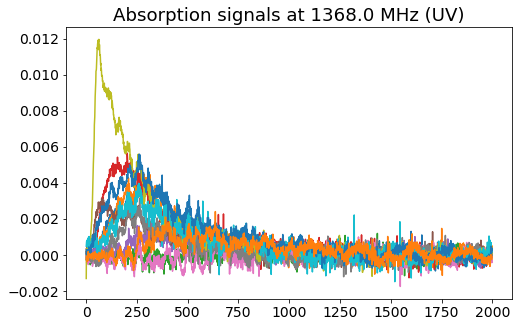

In [28]:
fig, ax = plt.subplots(figsize = (8,5))

ax.plot(norm_data_avg[idx_max].T)

ax.set_title(f'Absorption signals at {freq_data_avg[idx_max[0]]*4} MHz (UV)')
set_fontsize(ax, 14)
set_fontsize(ax1, 14)

# Correlation R0 F1 fluorescence and Q4 absorption

In [29]:
fname = "2021_2_24.hdf"
dset_name = "1614214951 R0 F1 correlation with Q4 Absorption"
devices = ()

In [30]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

In [31]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [46]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-46-77e179dc77fb>:9: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-46-77e179dc77fb>:10: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


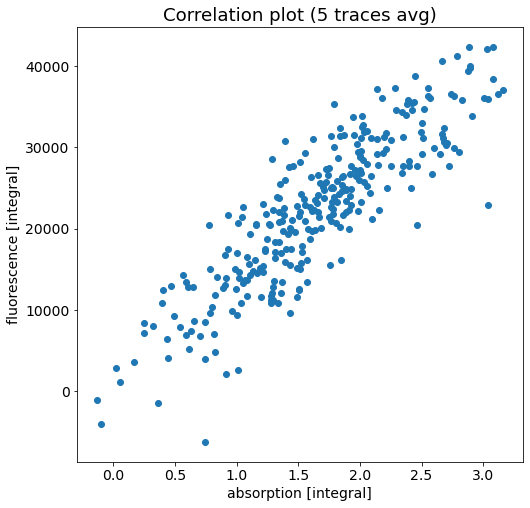

In [59]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

<ipython-input-61-efbc6f3b57b6>:1: RuntimeWarning: Mean of empty slice
  ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
<ipython-input-61-efbc6f3b57b6>:3: RuntimeWarning: Mean of empty slice
  pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]


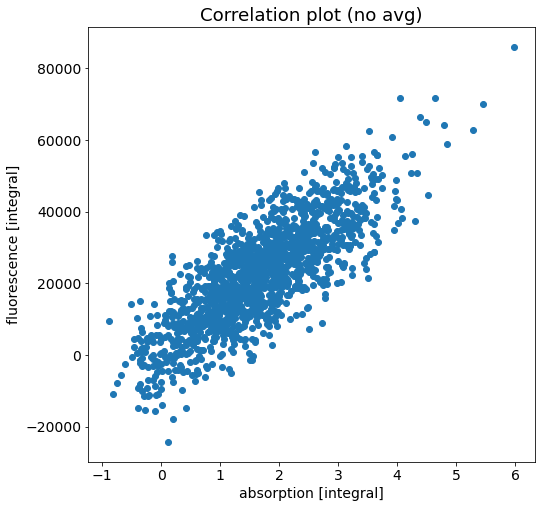

In [61]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

# Correlation R0 F1 fluorescence and Q4 absorption (Moved det beam slightly up (centered on windows))

In [63]:
fname = "2021_2_24.hdf"
dset_name = "1614216630 R0 F1 correlation with Q4 Absorption moved det up slightly (centered on both windows)"
devices = ()

In [64]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

In [65]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [67]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-67-77e179dc77fb>:9: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-67-77e179dc77fb>:10: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


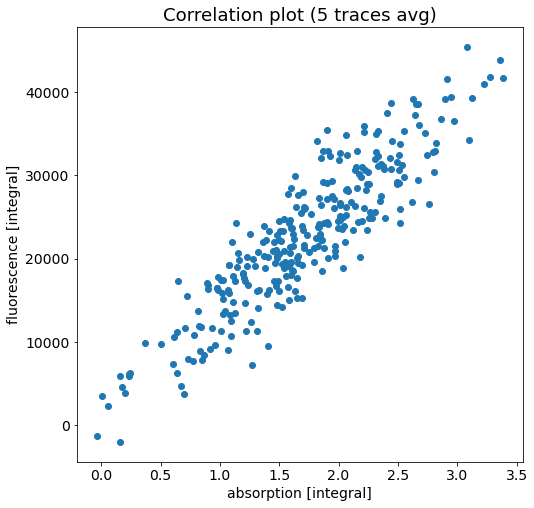

In [68]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

<ipython-input-69-efbc6f3b57b6>:1: RuntimeWarning: Mean of empty slice
  ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
<ipython-input-69-efbc6f3b57b6>:3: RuntimeWarning: Mean of empty slice
  pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]


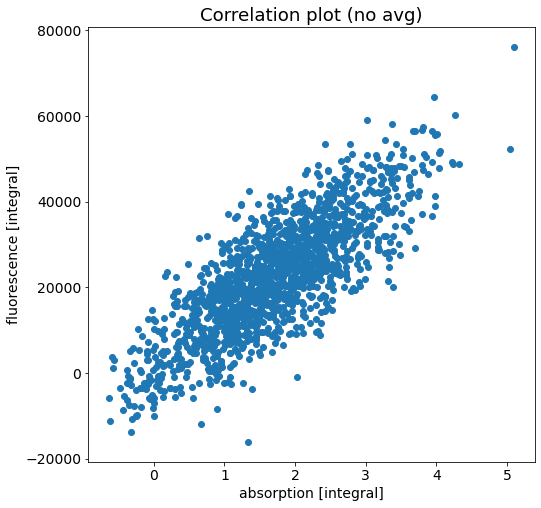

In [69]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

# Correlation R0 F1 fluorescence and Q4 absorption (Moved det beam slightly up (5 mm above window center))

In [71]:
fname = "2021_2_24.hdf"
dset_name = "1614217743 R0 F1 correlation with Q4 Absorption moved det up slightly (center 5 mm above window center)"
devices = ()

In [72]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

In [73]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [74]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-74-77e179dc77fb>:9: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-74-77e179dc77fb>:10: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


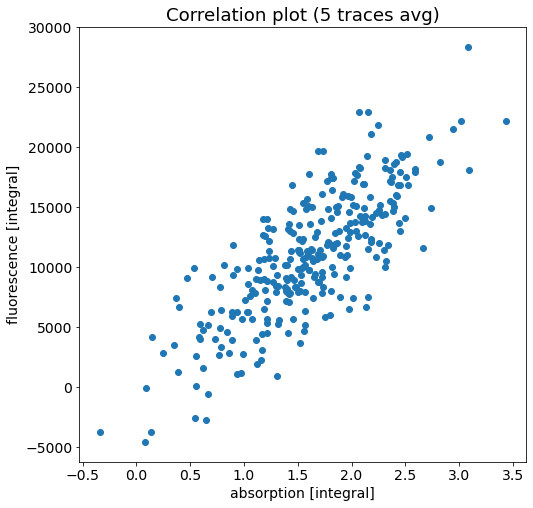

In [76]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

<ipython-input-77-efbc6f3b57b6>:1: RuntimeWarning: Mean of empty slice
  ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
<ipython-input-77-efbc6f3b57b6>:3: RuntimeWarning: Mean of empty slice
  pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]


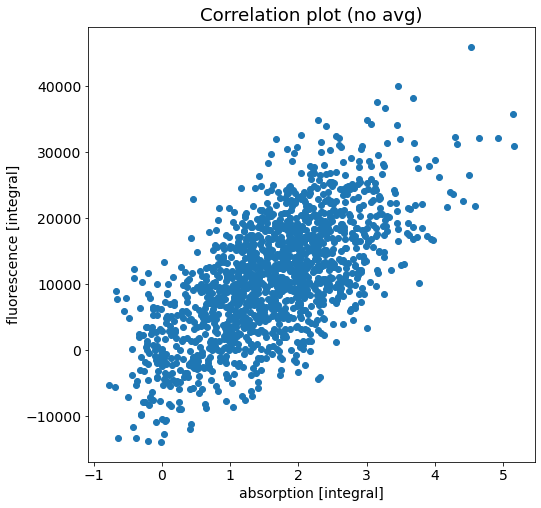

In [77]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

# Correlation R0 F1 fluorescence and Q4 absorption (Moved det beam slightly down (5 mm below window center))

In [79]:
fname = "2021_2_24.hdf"
dset_name = "1614218557 R0 F1 correlation with Q4 Absorption moved det up slightly (center 5 mm below window center)"
devices = ()

In [80]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

In [81]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [82]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-82-77e179dc77fb>:9: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-82-77e179dc77fb>:10: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


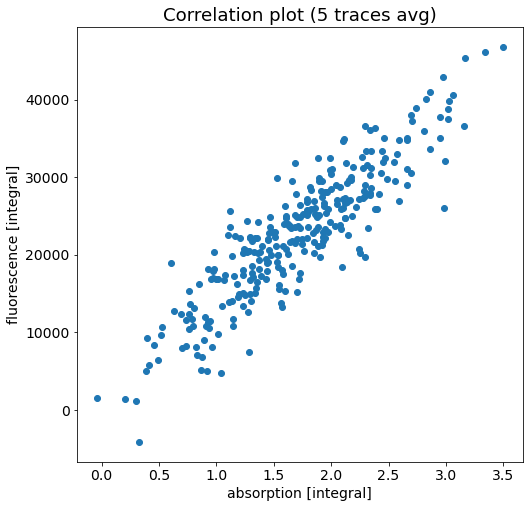

In [83]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

<ipython-input-84-efbc6f3b57b6>:1: RuntimeWarning: Mean of empty slice
  ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
<ipython-input-84-efbc6f3b57b6>:3: RuntimeWarning: Mean of empty slice
  pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]


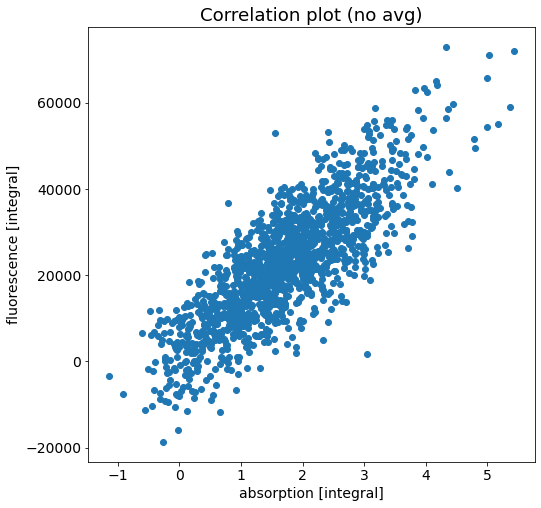

In [84]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

# Correlation R0 F1 fluorescence and Q4 absorption (Moved det beam slightly down (10 mm below window center))

In [85]:
fname = "2021_2_24.hdf"
dset_name = "1614219182 R0 F1 correlation with Q4 Absorption moved det up slightly (center 10 mm below window center)"
devices = ()

In [86]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

In [87]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [88]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,100:250].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,-750:].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,100:], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,10:1250], axis = 1)

<ipython-input-88-77e179dc77fb>:9: RuntimeWarning: Mean of empty slice
  pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
<ipython-input-88-77e179dc77fb>:10: RuntimeWarning: Mean of empty slice
  norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)


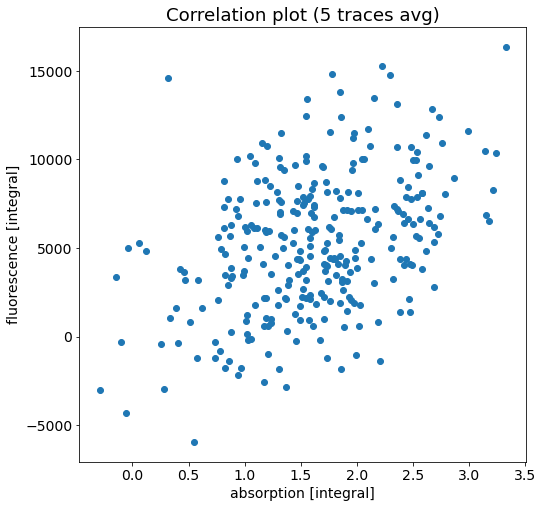

In [89]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

<ipython-input-90-efbc6f3b57b6>:1: RuntimeWarning: Mean of empty slice
  ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
<ipython-input-90-efbc6f3b57b6>:3: RuntimeWarning: Mean of empty slice
  pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]


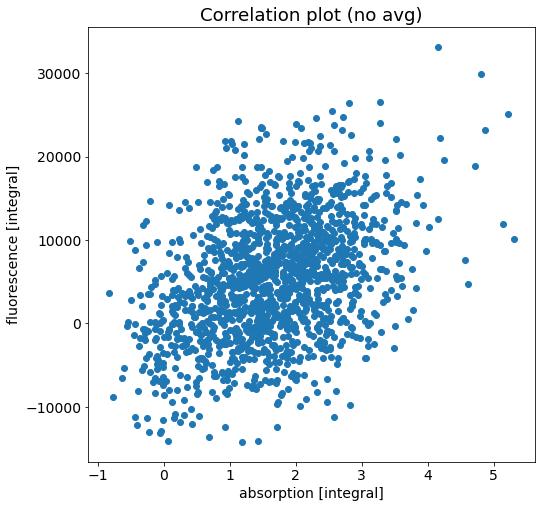

In [90]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)